<h1>Um estudo sobre acidentes aéreos</h1>

<h1>Perguntas a serem respondidas</h1>

Dentre outros <i>insights</i> gerados através deste estudo, quero responder as seguintes perguntas:
<br>
<br>
<li>Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?</li>
<li>Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?</li>
<li>Quais os estados que mais possuem ocorrências registradas?</li>
<li>Qual tipo de aeronave possui mais problemas? Aviões, jatos, planadores? </li>
<li>Quais as fabricantes com maior número de defeitos registrados?</li>
<li>Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?</li>
<li>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</li>
<li>Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro nos últimos 10 anos?</li>

<h2>Importando bibliotecas</h2>

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random

<h2>Leitura dos Datasets</h2>

In [3]:
ocorrencia = pd.read_csv('./dataset/ocorrencia.csv')
aeronave = pd.read_csv('./dataset/aeronave.csv')

In [4]:
print('O arquivo \"ocorrencia.csv\" ' + str(ocorrencia.shape[0]) + ' linhas e ' + str(ocorrencia.shape[1]) + ' colunas')

O arquivo "ocorrencia.csv" 2027 linhas e 19 colunas


In [5]:
print('O arquivo \"aeronave.csv\" ' + str(aeronave.shape[0]) + ' linhas e ' +str(aeronave.shape[1]) + ' colunas')

O arquivo "aeronave.csv" 2043 linhas e 22 colunas


<h2>Limpeza de Dados</h2>

In [6]:
ocorrencia.head()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


In [7]:
ocorrencia.dtypes

codigo_ocorrencia             int64
classificacao                object
tipo                         object
localidade                   object
uf                           object
pais                         object
aerodromo                    object
dia_ocorrencia               object
horario                      object
sera_investigada             object
comando_investigador         object
status_investigacao          object
numero_relatorio             object
relatorio_publicado         float64
dia_publicacao               object
quantidade_recomendacoes      int64
aeronaves_envolvidas          int64
saida_pista                 float64
dia_extracao                 object
dtype: object

In [8]:
ocorrencia.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'dia_extracao'],
      dtype='object')

In [9]:
# Retirando colunas que não serão usadas
ocorrencia.drop(['aerodromo', 'horario', 'sera_investigada', 'comando_investigador', 
                 'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
                 'aeronaves_envolvidas', 'saida_pista', 'dia_extracao', 'numero_relatorio'], axis = 1, inplace = True)

In [28]:
# Renomeando colunas do dataset ocorrencia.csv
ocorrencia.columns = ['CÓDIGO DA OCORRÊNCIA', 'CLASSIFICAÇÃO', 'TIPO DE OCORRÊNCIA', 'LOCALIDADE', 
                      'UF', 'PAÍS', 'DIA DA OCORRÊNCIA', 'STATUS DA INVESTIGAÇÃO']

ocorrencia['CONTAGEM'] = 1

In [14]:
# Derrubando colunas onde o código da ocorrência é inválido
ocorrencia.dropna(axis = 0, inplace = True)

In [29]:
ocorrencia.head()

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,2013-11-25,FINALIZADA,1
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,2008-08-07,FINALIZADA,1
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,2011-08-11,FINALIZADA,1
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,2009-12-28,ATIVA,1
6,43063,ACIDENTE,PERDA DE CONTROLE EM VOO,ALTO ALEGRE,RR,BRASIL,2010-09-21,FINALIZADA,1


<h2>Visualisação de Dados (Data Visualization)</h2>

In [32]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

Como é classificada uma ocorrência? Como se divide o total geral nestas categorias?

<function matplotlib.pyplot.show>

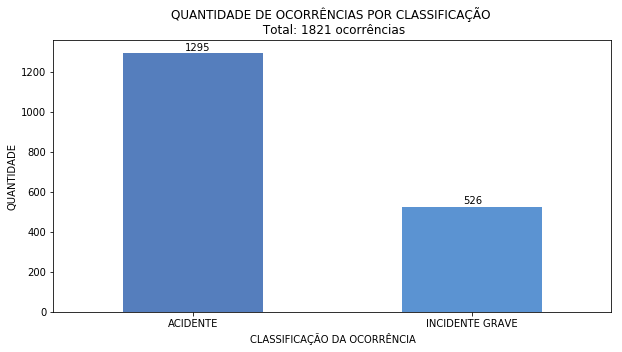

In [33]:
classificacao = ocorrencia.groupby('CLASSIFICAÇÃO')['CONTAGEM'].sum().plot(kind = 'bar', figsize = (10, 5), color = random.choice(colors), alpha = .7)

for p in classificacao.patches : 
    b = p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation = 0)
plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.show

Quais os tipos de ocorrências que existem e qual foi sua frequência nestes últimos anos?

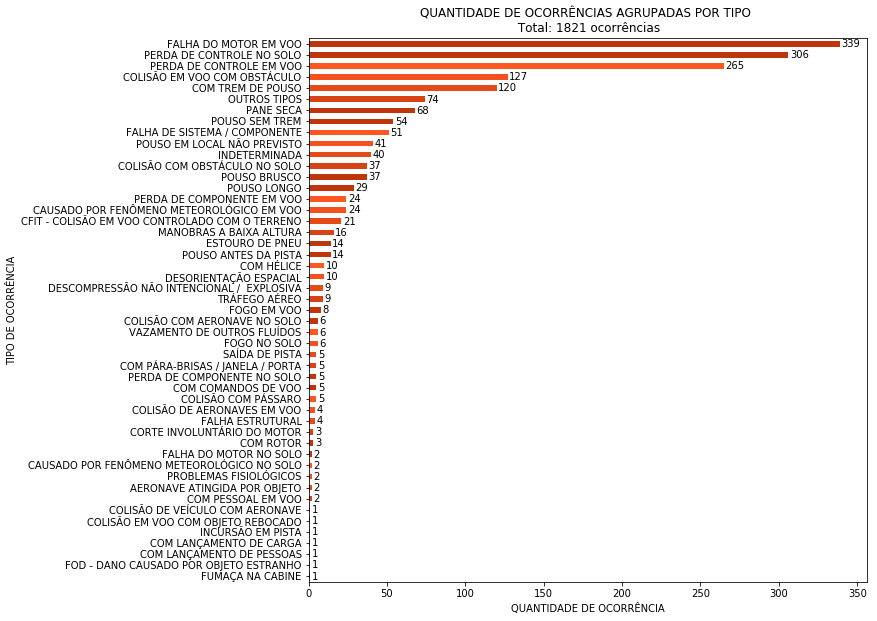

In [34]:
ax = ocorrencia.groupby('TIPO DE OCORRÊNCIA')['CONTAGEM'].sum().sort_values().plot(kind = 'barh', color = random.choice(colors), figsize = (10, 10))

for p in ax.patches :
    b = p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

Como tem sido a progressão desses últimos anos? Tiveram menos ocorrências ou mais?

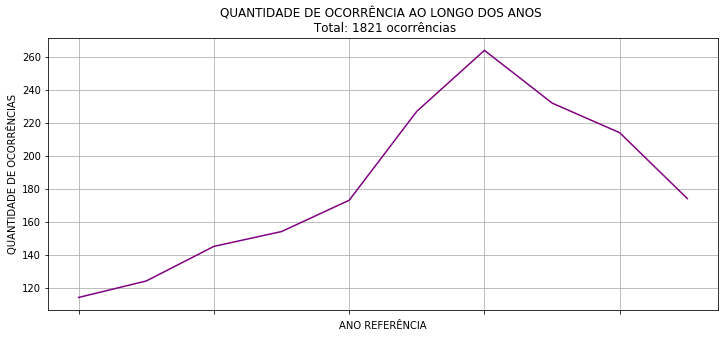

In [38]:
plotagem_dataplotagem_  = ocorrencia.copy()
plotagem_data['DIA DA OCORRÊNCIA'] = plotagem_data['DIA DA OCORRÊNCIA'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('DIA DA OCORRÊNCIA')['CONTAGEM'].sum().plot(color='purple', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

E quanto aos estados? Quais foram os que mais registraram ocorrências?

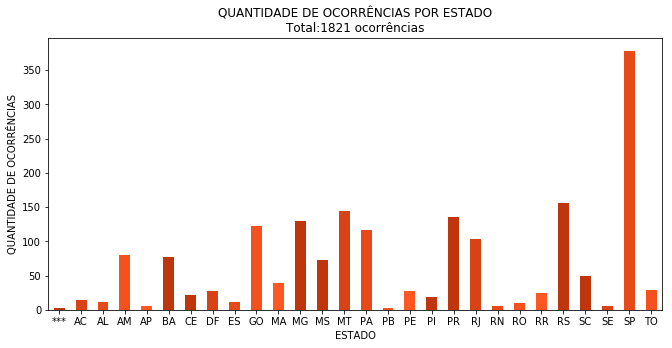

In [39]:
ax_estado = ocorrencia.groupby('UF')['CONTAGEM'].sum().plot(kind = 'bar', color = random.choice(colors), figsize = (11, 5))

plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO\nTotal:' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xticks(rotation = 0)
plt.show()

In [40]:
#Duas ocorrências em que não tiveram locais determinados
ocorrencia[ocorrencia['UF'] == '***']

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
2006,53112,ACIDENTE,OUTROS TIPOS,NÃO IDENTIFICADA,***,BRASIL,2015-03-06,ATIVA,1
2025,49474,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ÁGUAS INTERNACIONAIS,***,BRASIL,2013-09-01,ATIVA,1


<h2>Analisando o dataset de aeronaves</h2>

<h3>Limpeza dos dados (Data Cleaning)</h3>

In [41]:
aeronave.head()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,NaN,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,NaN,2016-07-30


In [42]:
aeronave.drop(['codigo_aeronave','matricula','codigo_operador','peso_maximo_decolagem',
               'categoria_registro', 'origem_voo', 'destino_voo', 'dia_extracao'], axis = 1, inplace = True)

aeronave.head()

,codigo_ocorrencia,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,quantidade_assentos,ano_fabricacao,pais_registro,categoria_aviacao,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades
0,45602,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,2.0,1962.0,BRASIL,INSTRUÇÃO,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN
1,53551,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,2.0,1960.0,BRASIL,INSTRUÇÃO,DECOLAGEM,INSTRUÇÃO,LEVE,NaN
2,43721,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,6.0,1966.0,BRASIL,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN
3,35556,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,6.0,1979.0,BRASIL,PARTICULAR,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN
4,32579,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,117.0,1975.0,BRASIL,REGULAR,SUBIDA,REGULAR,NENHUM,NaN


In [43]:
aeronave.dtypes

codigo_ocorrencia           int64
equipamento                object
fabricante                 object
modelo                     object
tipo_motor                 object
quantidade_motores        float64
quantidade_assentos       float64
ano_fabricacao            float64
pais_registro              object
categoria_aviacao          object
fase_operacao              object
tipo_operacao              object
nivel_dano                 object
quantidade_fatalidades    float64
dtype: object

In [46]:
def convert_na(dataframe, column) : 
    for i in column :
        dataframe[i].fillna(0, inplace = True)
        
convert_na(aeronave,['quantidade_fatalidades','quantidade_motores','ano_fabricacao','quantidade_assentos'])

In [48]:
def convert_dtype(dataframe, column, dtype) :
    for i in column :
        dataframe[i] = dataframe[i].astype(dtype)
        
convert_dtype(aeronave,['quantidade_motores','quantidade_assentos','ano_fabricacao','quantidade_fatalidades'],int)

In [49]:
#Dtypes de float alterados para int
aeronave.dtypes

codigo_ocorrencia          int64
equipamento               object
fabricante                object
modelo                    object
tipo_motor                object
quantidade_motores         int32
quantidade_assentos        int32
ano_fabricacao             int32
pais_registro             object
categoria_aviacao         object
fase_operacao             object
tipo_operacao             object
nivel_dano                object
quantidade_fatalidades     int32
dtype: object

In [50]:
aeronave.columns = ['CÓDIGO DA OCORRÊNCIA','EQUIPAMENTO','FABRICANTE','MODELO','TIPO DE MOTOR','QUANTIDADE DE MOTORES',
                    'QUANTIDADE DE ASSENTOS','ANO DE FABRICAÇÃO','PAÍS DE REGISTRO','CATEGORIA DE AVIÃO','FASE DE OPERAÇÃO',
                    'TIPO DE OPERAÇÃO','NÍVEL DE DANO','QUANTIDADE DE FATALIDADES']

aeronave = aeronave.apply(lambda x : x.replace('***', 'NÃO IDENTIFICADO'))
aeronave['CONTAGEM'] = 1

In [51]:
#DataFrame alterado#DataFram 
aeronave.head()

,CÓDIGO DA OCORRÊNCIA,EQUIPAMENTO,FABRICANTE,MODELO,TIPO DE MOTOR,QUANTIDADE DE MOTORES,QUANTIDADE DE ASSENTOS,ANO DE FABRICAÇÃO,PAÍS DE REGISTRO,CATEGORIA DE AVIÃO,FASE DE OPERAÇÃO,TIPO DE OPERAÇÃO,NÍVEL DE DANO,QUANTIDADE DE FATALIDADES,CONTAGEM
0,45602,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1,2,1962,BRASIL,INSTRUÇÃO,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,0,1
1,53551,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1,2,1960,BRASIL,INSTRUÇÃO,DECOLAGEM,INSTRUÇÃO,LEVE,0,1
2,43721,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2,6,1966,BRASIL,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0,1
3,35556,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1,6,1979,BRASIL,PARTICULAR,CORRIDA APÓS POUSO,PRIVADA,LEVE,0,1
4,32579,AVIÃO,BOEING COMPANY,737-241,JATO,2,117,1975,BRASIL,REGULAR,SUBIDA,REGULAR,NENHUM,0,1


In [52]:
#Verificando se os dataframes são iguais
aeronave['CÓDIGO DA OCORRÊNCIA'].equals(ocorrencia['CÓDIGO DA OCORRÊNCIA'])

False

In [53]:
# Pegando as linhas duplicadas do DataFrame
ocorrencias_duplicadas = aeronave[aeronave['CÓDIGO DA OCORRÊNCIA'].duplicated()].reset_index(drop = True)
ocorrencias_duplicadas.drop('CONTAGEM', axis = 1, inplace = True)

In [54]:
print('Há ' + str(ocorrencias_duplicadas.shape[0]) + ' ocorrências duplicadas.')

Há 16 ocorrências duplicadas.


In [55]:
ocorrencias_duplicadas.head(6)

,CÓDIGO DA OCORRÊNCIA,EQUIPAMENTO,FABRICANTE,MODELO,TIPO DE MOTOR,QUANTIDADE DE MOTORES,QUANTIDADE DE ASSENTOS,ANO DE FABRICAÇÃO,PAÍS DE REGISTRO,CATEGORIA DE AVIÃO,FASE DE OPERAÇÃO,TIPO DE OPERAÇÃO,NÍVEL DE DANO,QUANTIDADE DE FATALIDADES
0,52288,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-B,PISTÃO,1,2,1963,BRASIL,INSTRUÇÃO,POUSO,INSTRUÇÃO,NENHUM,0
1,50801,HELICÓPTERO,ROBINSON HELICOPTER,R44,PISTÃO,1,4,2001,BRASIL,PARTICULAR,PARTIDA DO MOTOR,PRIVADA,SUBSTANCIAL,0
2,38419,AVIÃO,LEARJET,45,JATO,2,9,2004,BRASIL,PARTICULAR,ESTACIONAMENTO,PRIVADA,NÃO IDENTIFICADO,0
3,38419,AVIÃO,RAYTHEON AIRCRAFT,HAWKER 800XP,JATO,2,10,1998,BRASIL,TÁXI AÉREO,ESTACIONAMENTO,TÁXI AÉREO,NÃO IDENTIFICADO,0
4,43869,ULTRALEVE,NÃO IDENTIFICADO,FOX II,PISTÃO,1,2,1990,BRASIL,EXPERIMENTAL,INDETERMINADA,EXPERIMENTAL,DESTRUÍDA,0
5,45222,AVIÃO,CESSNA AIRCRAFT,550,JATO,2,10,1978,BRASIL,TÁXI AÉREO,DECOLAGEM,TÁXI AÉREO,NENHUM,0


<h3>Visualização dos Dados (Data Visualization)</h3>

Qual tipo de motor mais gerou ocorrências nos últimos 10 anos?

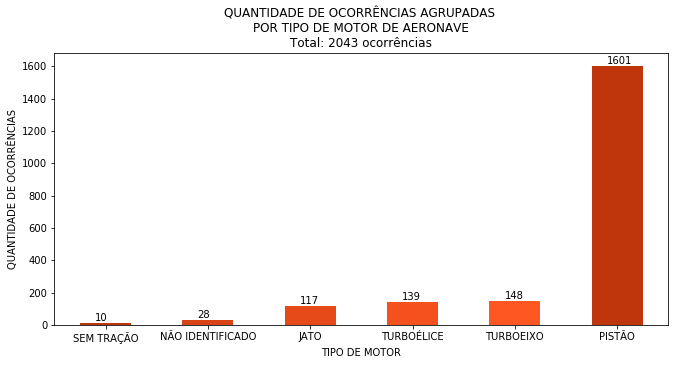

In [57]:
ax = aeronave.groupby('TIPO DE MOTOR')['CONTAGEM'].sum().sort_values().plot(kind = 'bar', color = random.choice(colors), figsize = (11, 5))

for p in ax.patches :
    b = p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS \nPOR TIPO DE MOTOR DE AERONAVE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation = 0)
plt.show()

Será que ocorrências envolvendo aviões aparecem em menor frequência do que para helicópter e outras aeronaves? 

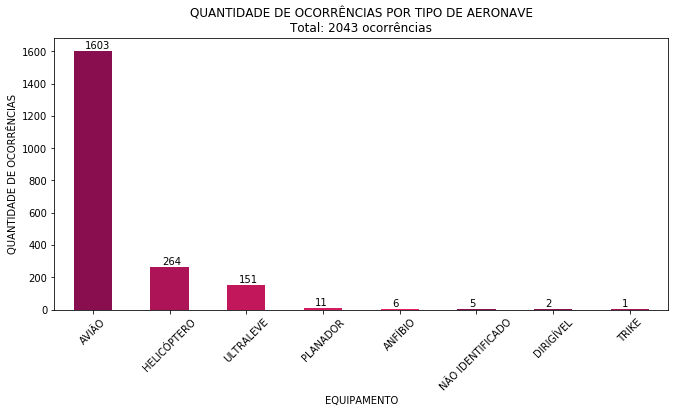

In [62]:
ax = aeronave.groupby('EQUIPAMENTO')['CONTAGEM'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (11, 5), color = random.choice(colors))

for p in ax.patches : 
    b = p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO DE AERONAVE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=45)
plt.show()

Se temos tantas quantidades de ocorrências registradas nesses anos, quais são as fabricantes que mais aparecem nos problemas relatados?

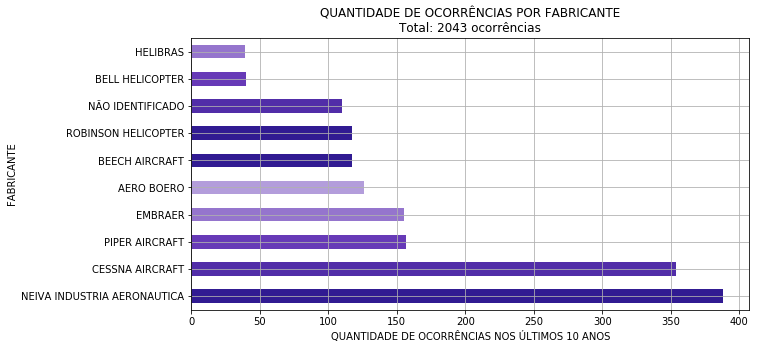

In [63]:
ocorrencias_fabricante = aeronave.groupby('FABRICANTE')['CONTAGEM'].sum().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?

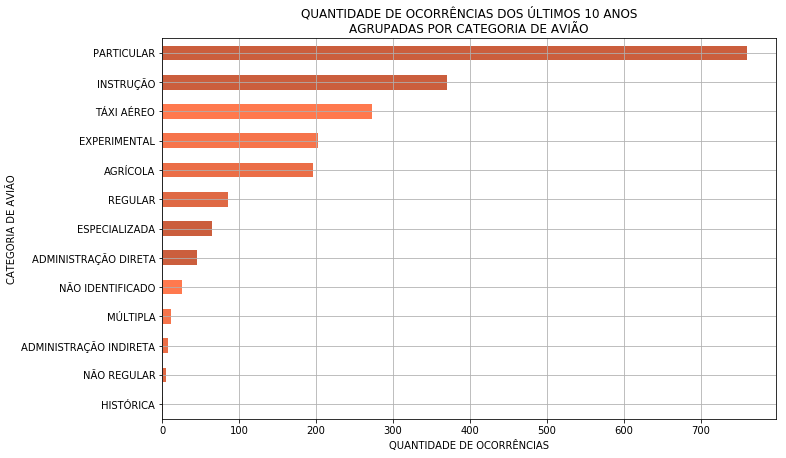

In [66]:
categoria_aviao = aeronave.groupby('CATEGORIA DE AVIÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), alpha=.8, grid = True)

plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS\nAGRUPADAS POR CATEGORIA DE AVIÃO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

Vamos agora olhar para o momento em que as ocorrências surgiram. Com isso, quero saber se é mais propício ocorrer um problema durante o pouso, decolagem ou outro momento da viagem.

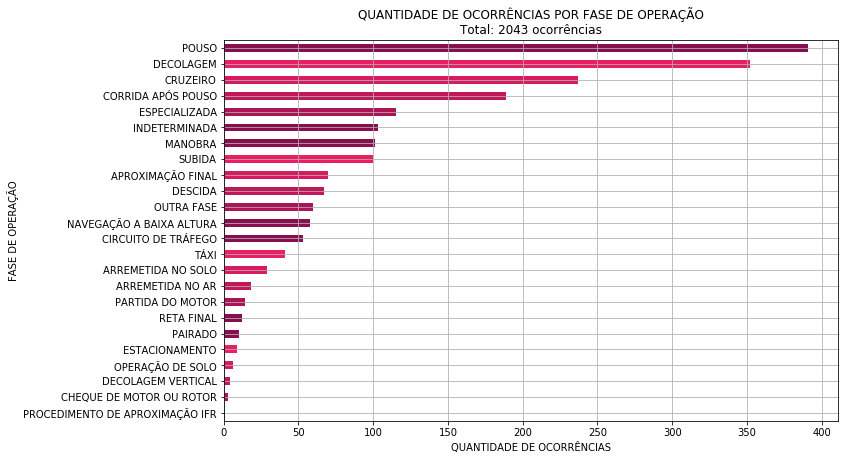

In [65]:
fase_de_operacao = aeronave.groupby('FASE DE OPERAÇÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), grid = True)
plt.title('QUANTIDADE DE OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

Afinal, quais são os tipos de danos que podem ocorrer a uma aeronave? Qual a frequência?

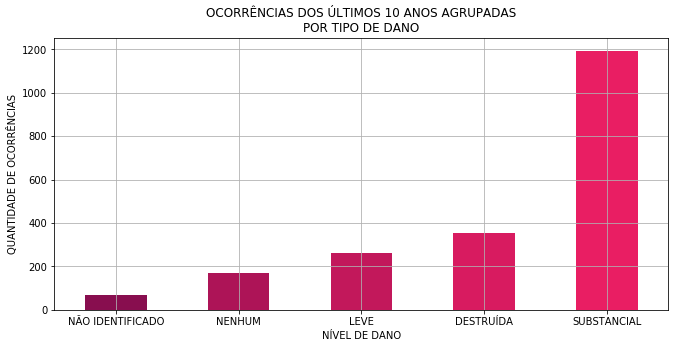

In [67]:
tipo_de_dano = aeronave.groupby('NÍVEL DE DANO')['CONTAGEM'].sum().sort_values().plot(kind='bar', figsize=(11,5), color=random.choice(colors), grid = True)

plt.title('OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR TIPO DE DANO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()


Por fim, quero saber em quantas ocorrências houveram fatalidades. Para ter essa informação, agruparei os casos onde pessoas morreram por quantidade, a fim de saber não só quantas fatalidades houveram nesta última década, mas também a sua frequência.

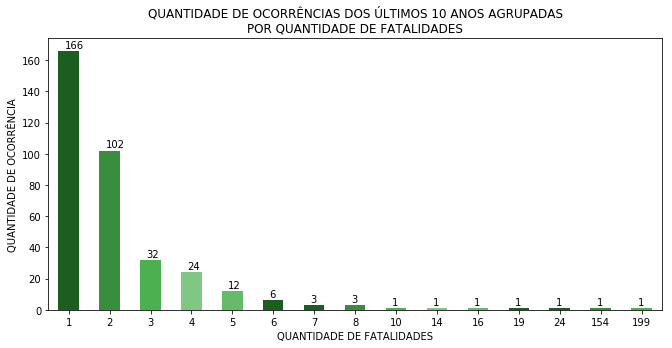

In [68]:
fatalidades_maior_que_zero = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 0]
fatalidades = fatalidades_maior_que_zero.groupby('QUANTIDADE DE FATALIDADES')['CONTAGEM'].sum().plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in fatalidades.patches:
    b=p.get_bbox()
    fatalidades.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 2))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR QUANTIDADE DE FATALIDADES')
plt.ylabel('QUANTIDADE DE OCORRÊNCIA')
plt.xticks(rotation=0)
plt.show()

In [71]:
piores_acidentespiores_ac  = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 100]
piores_acidentespiores_ac

,CÓDIGO DA OCORRÊNCIA,EQUIPAMENTO,FABRICANTE,MODELO,TIPO DE MOTOR,QUANTIDADE DE MOTORES,QUANTIDADE DE ASSENTOS,ANO DE FABRICAÇÃO,PAÍS DE REGISTRO,CATEGORIA DE AVIÃO,FASE DE OPERAÇÃO,TIPO DE OPERAÇÃO,NÍVEL DE DANO,QUANTIDADE DE FATALIDADES,CONTAGEM
620,29859,AVIÃO,AIRBUS INDUSTRIE,A320-233,JATO,2,185,1998,BRASIL,REGULAR,POUSO,REGULAR,DESTRUÍDA,199,1
638,30375,AVIÃO,BOEING COMPANY,737-8EH,JATO,2,188,2006,BRASIL,REGULAR,CRUZEIRO,REGULAR,DESTRUÍDA,154,1


In [74]:
# Linha da ocorrência gerada devido ao acidente do Airbus A-320#Linha da 
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 29859]

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
1900,29859,ACIDENTE,PERDA DE CONTROLE NO SOLO,SÃO PAULO,SP,BRASIL,2007-07-17,FINALIZADA,1


In [73]:
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 30375]

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
855,30375,ACIDENTE,COLISÃO DE AERONAVES EM VOO,PEIXOTO DE AZEVEDO,MT,BRASIL,2006-09-29,FINALIZADA,1
